In [121]:
import sklearn
from sklearn import datasets
import sklearn.cross_validation
import sklearn.pipeline
import sklearn.linear_model
import sklearn.decomposition
import sklearn.ensemble
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Load the Data

In [22]:
iris = datasets.load_iris()

In [76]:
X = pd.DataFrame(iris.data[:,2:4], columns=('petalLength', 'petalWidth'))
Y = pd.DataFrame(iris.target)

In [77]:
#plt.scatter(X.sepalLength, X.sepalWidth, c=Y)
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')

/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


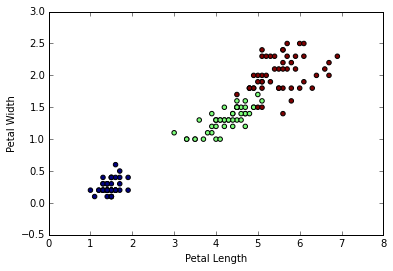

In [79]:
plt.scatter(X.petalLength, X.petalWidth, c=Y)
plt.ylabel('Petal Width')
plt.xlabel('Petal Length')

# Seperate into Training and Testing Sets

In [80]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, stratify=Y)

# Make a pipeline to transform and train classifier

In [180]:
pipeline = sklearn.pipeline.Pipeline((
    ('normalize', sklearn.preprocessing.StandardScaler()),
    ('polynomial_features', sklearn.preprocessing.PolynomialFeatures(degree=3)),
    ('orthogonalization', sklearn.decomposition.RandomizedPCA()),
    #('classify', sklearn.linear_model.RidgeClassifierCV()),
    #('classify', sklearn.ensemble.RandomForestClassifier(n_estimators=50)),
    ('classify', sklearn.linear_model.Perceptron()),
))

In [181]:
pipeline.fit(X_train, Y_train)

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=(('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('orthogonalization', RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)), ('classify', Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False))))

In [182]:
pipeline.score(X_test, Y_test)

0.94871794871794868

/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


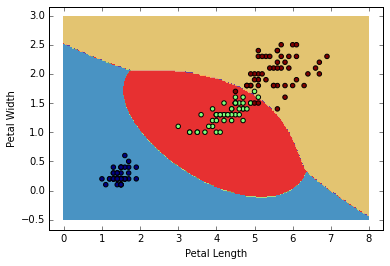

In [183]:
plot_step = 0.02

# x_min, x_max = X_train.values[:, 0].min(), X_train.values[:, 0].max()
# y_min, y_max = X_train.values[:, 1].min(), X_train.values[:, 1].max()
x_min, x_max = 0, 8
y_min, y_max = -0.5, 3

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X.petalLength, X.petalWidth, c=Y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')